In [14]:
# Previsão de Vendas de Guarda-Chuvas - Chuva Boa ☔

## 🌧️ Cenário
#Você é responsável pela área de planejamento e vendas de uma rede varejista chamada **Chuva Boa**, especializada em artigos de proteção contra o clima, com foco principal na venda de guarda-chuvas. A rede possui lojas em diversas cidades e uma operação online crescente.

#Ao longo dos anos, você percebeu um padrão: **as vendas de guarda-chuvas aumentam consideravelmente nos dias com maior probabilidade de chuva**. No entanto, como o clima é naturalmente imprevisível, a empresa tem enfrentado dois grandes desafios:
#- **Estoque em excesso** nos dias secos, com produtos encalhados e aumento de custos com armazenamento.
#- **Falta de produtos** nos dias chuvosos, gerando perda de vendas e insatisfação dos clientes.

#Você acredita que uma **abordagem preditiva baseada em dados climáticos** pode transformar essa realidade. A ideia é simples, mas poderosa: utilizar a **probabilidade de chuva** como variável para prever a **demanda diária por guarda-chuvas**, permitindo:

#-  Planejamento mais eficiente da produção e da logística  
#-  Reposição proativa de estoques nas lojas e no e-commerce  
#-  Redução de perdas e aumento da receita

#Com a ajuda de técnicas de **Machine Learning**, você inicia o desenvolvimento de um modelo preditivo utilizando uma base de dados com 6 meses de histórico, contendo:
#- A **data**
#- A **probabilidade de chuva (%)** para o dia
#- A **quantidade de guarda-chuvas vendidos**

#Vamos começar!

In [1]:
# Instalar bibliotecas
!pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carregar o CSV:
df = pd.read_csv('vendas_guarda_chuvas.csv')
df['Data'] = pd.to_datetime(df['Data'])
df.head()

,Data,ProbabilidadeChuva(%),VendasGuardaChuvas
0,2025-01-01,37.5,36
1,2025-01-02,27.9,22
2,2025-01-03,39.7,52
3,2025-01-04,52.8,61
4,2025-01-05,26.5,38


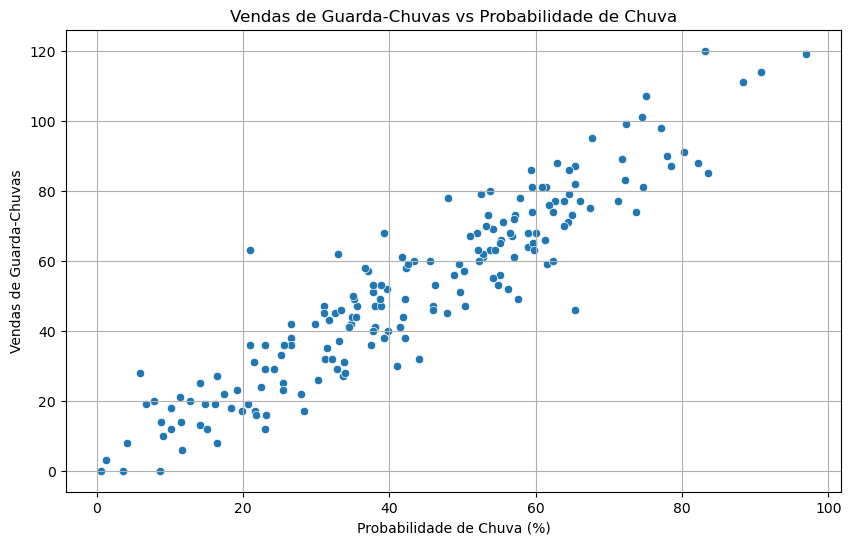

In [3]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ProbabilidadeChuva(%)', y='VendasGuardaChuvas')
plt.title('Vendas de Guarda-Chuvas vs Probabilidade de Chuva')
plt.xlabel('Probabilidade de Chuva (%)')
plt.ylabel('Vendas de Guarda-Chuvas')
plt.grid(True)
plt.show()

In [5]:
# Preparar os dados para o modelo
X = df[['ProbabilidadeChuva(%)']]
y = df['VendasGuardaChuvas']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

MSE: 79.09087634117788
R²: 0.8875287373650688


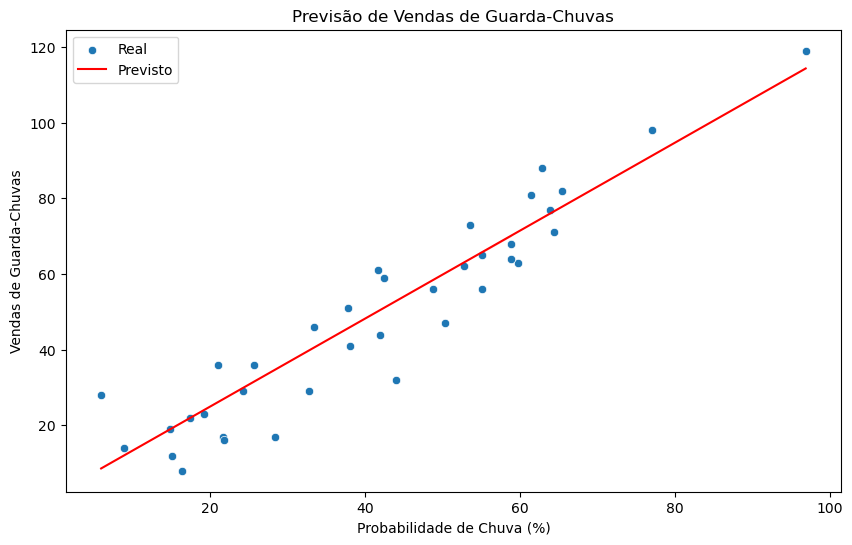

In [7]:
# Avaliar o modelo
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# Visualizar a regressão
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_test['ProbabilidadeChuva(%)'], y=y_test, label='Real')
sns.lineplot(x=X_test['ProbabilidadeChuva(%)'], y=y_pred, color='red', label='Previsto')
plt.title('Previsão de Vendas de Guarda-Chuvas')
plt.xlabel('Probabilidade de Chuva (%)')
plt.ylabel('Vendas de Guarda-Chuvas')
plt.legend()
plt.show()